In [1]:
install.packages('repr')
library(repr)

package 'repr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rossz\AppData\Local\Temp\RtmpyCwgRw\downloaded_packages


Warning message:
"package 'repr' was built under R version 3.6.3"


In [2]:
dt = as.data.table(mtcars)
dt

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [7]:
a = matrix(c(-0.6,0.2,  0.2,  0.2,
             0,   -0.5, 0.5,  0,
             0,   0,    -0.8, 0.8,
             0,   0,    0.1,  0.9), ncol=4, byrow=T)
b = matrix(c(0,0,0,0), ncol=1)
solve(a, b)

0
0
0
0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from transformers import BertTokenizer, BertForQuestionAnswering, BertConfig

from captum.attr import visualization as viz
from captum.attr import IntegratedGradients, LayerConductance, LayerIntegratedGradients
from captum.attr import configure_interpretable_embedding_layer, remove_interpretable_embedding_layer

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model.to(device)
model.eval()
model.zero_grad()

# load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

def predict(inputs, token_type_ids=None, position_ids=None, attention_mask=None):
    return model(inputs, token_type_ids=token_type_ids,
                 position_ids=position_ids, attention_mask=attention_mask, )

def squad_pos_forward_func(inputs, token_type_ids=None, position_ids=None, attention_mask=None, position=0):
    pred = predict(inputs,
                   token_type_ids=token_type_ids,
                   position_ids=position_ids,
                   attention_mask=attention_mask)
    pred = pred[position]
    return pred.max(1).values

# Plotly

In [19]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(
        title=go.layout.Title(text="Converting Graph Objects To Dictionaries and JSON"),
        autosize=False
    )
)
fig

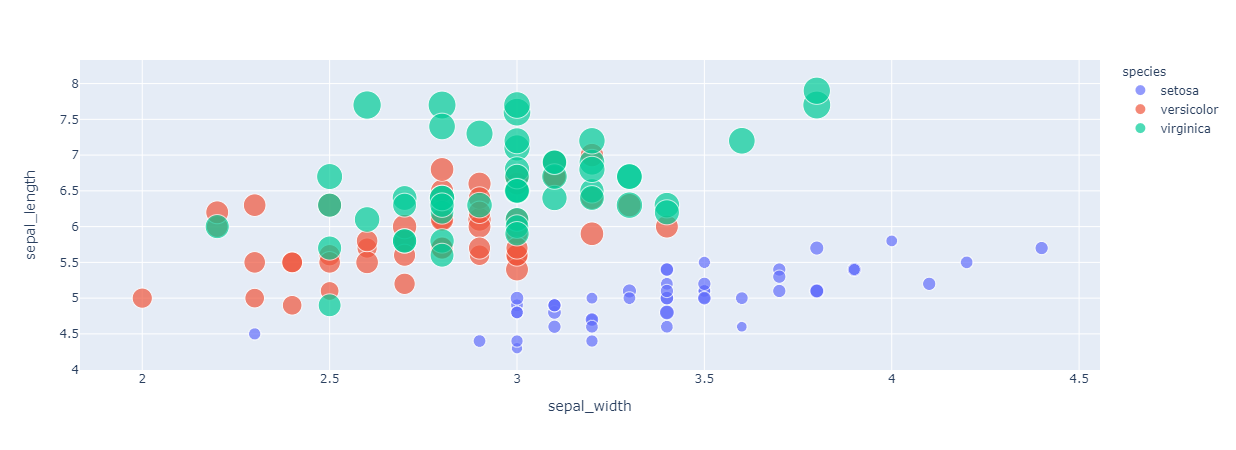

In [110]:
df = px.data.iris()
fig = (px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
 .update_layout(autosize=False))
fig

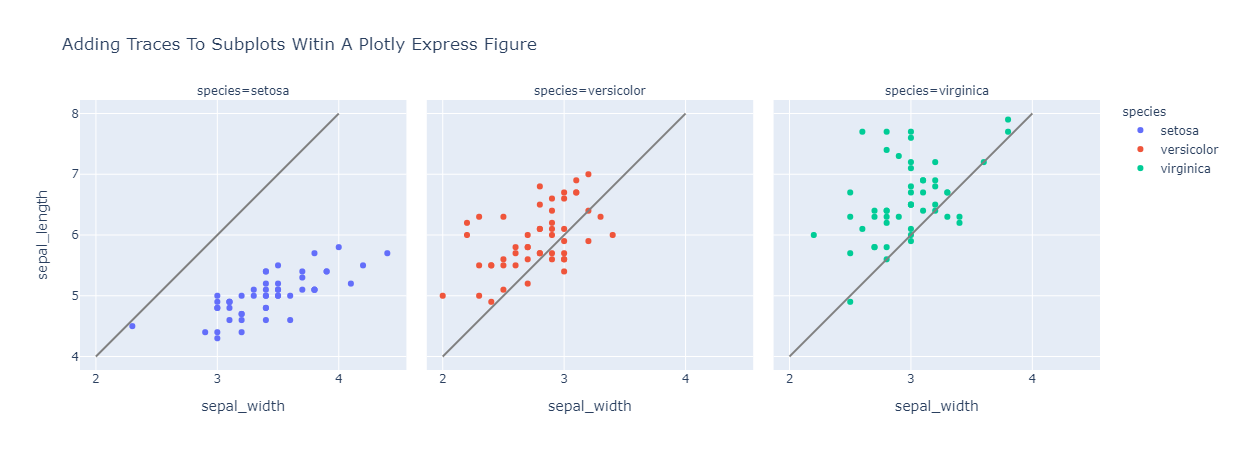

In [57]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species", facet_col="species", 
                 title="Adding Traces To Subplots Witin A Plotly Express Figure")
reference_line = go.Scatter(x=[2, 4],
                            y=[4, 8],
                            mode="lines",
                            marker={'color':'gray'},
                            showlegend=False)
(fig.add_trace(reference_line, 1, 1)
 .add_trace(reference_line, 1, 2)
 .add_trace(reference_line, 1, 3)
)